Matplotlib: plotting

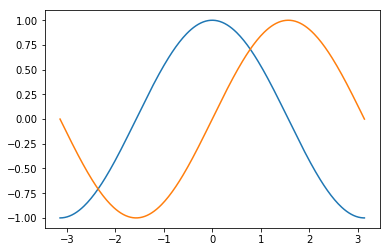

In [2]:
#Plotting with default settings
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

Figures and Subplots

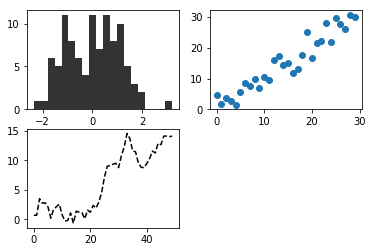

In [7]:
fig = plt.figure() #create an empty plot windown
ax1 = fig.add_subplot(2, 2, 1) #create first plot
ax2 = fig.add_subplot(2, 2, 2) #create second plot
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') #draw on the latest plot, 'k--' is a style option instructing matplotlib to plot a black dashed line
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.8) #distribute into 20 buckets, alpha: 0 - transparent to 1 - opaque
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

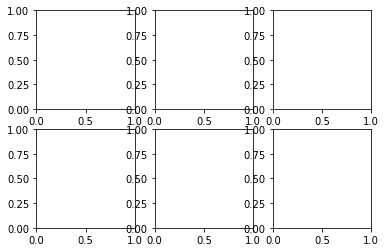

In [14]:
fig, axes = plt.subplots(2, 3)

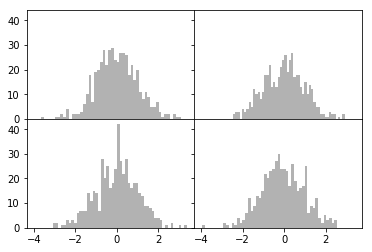

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):    
    for j in range(2):        
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.3)
plt.subplots_adjust(wspace=0, hspace=0) #change spacing

Colors, Markers, and Line Styles

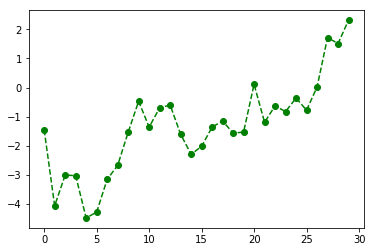

In [9]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

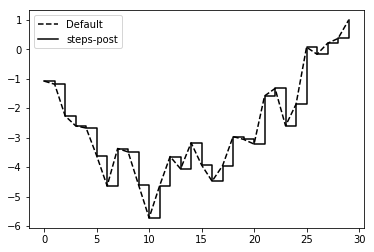

In [23]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') #legend created with label

Ticks, Labels, and Legends

[Text(0.5,0,'Stages'), Text(0.5,1,'My first matplotlib plot')]

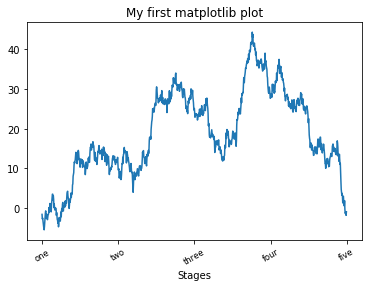

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],   
                            rotation=30, fontsize='small')
#ax.set_title('My first matplotlib plot')
#ax.set_xlabel('Stages')
props = {    
    'title': 'My first matplotlib plot',    
    'xlabel': 'Stages'}
ax.set(**props)

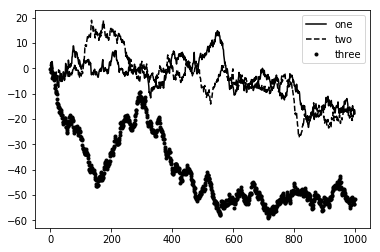

In [27]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') #label added, later legend can use
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

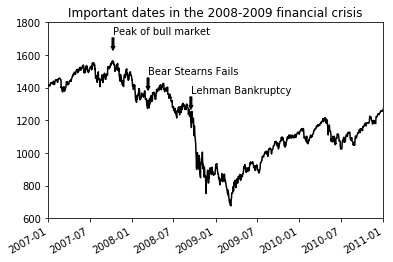

In [29]:
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),    
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),    
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
for date, label in crisis_data:    
    ax.annotate(label, xy=(date, spx.asof(date) + 75),                
                xytext=(date, spx.asof(date) + 225),                
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),                
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

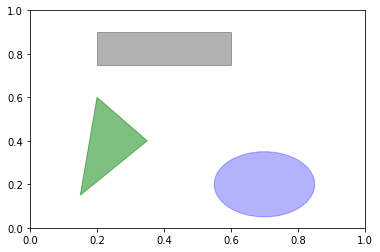

In [33]:
#To add a shape to a plot, you create the patch object shp and add it to a subplot 
#by calling ax.add_patch(shp)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('figpath.svg')
#dpi controls the dots-per-inch resolution
#bbox_inches trims the whitespace around the actual figure
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer) #write to any file-like object, such as a BytesIO
plot_data = buffer.getvalue()